In [1]:
import os
import re
import pathlib
import time
import itertools
import glob
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from IPython import display
from sklearn.model_selection import train_test_split

from generator import *
from discriminator import *
from loss import *
from utils import *
from train import *

%load_ext autoreload
%autoreload 2

## Loading dataset

In [2]:
cities = ['la','bos','nyc','chi','sp', 'bue', 'joh', 'syd', 'tok', 'par', 'mex', 'sea', 'aus']
dates = ['winter', 'spring', 'summer']
zoom = 16
shadow_path = 'data/shadows/'
height_path = 'data/heights/'
checkpoint_name = 'all-all'
checkpoint_path = 'training_checkpoints/%s'%(checkpoint_name)

TILES_PER_CITY = 270
BATCH_SIZE = 2

In [4]:
train_dataset, test_dataset = get_train_test(height_path, shadow_path, cities, dates, zoom, TILES_PER_CITY, BATCH_SIZE)

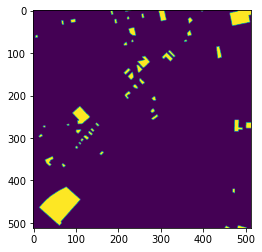

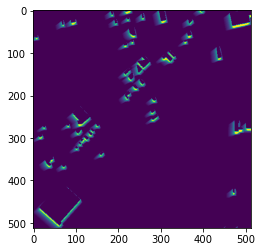

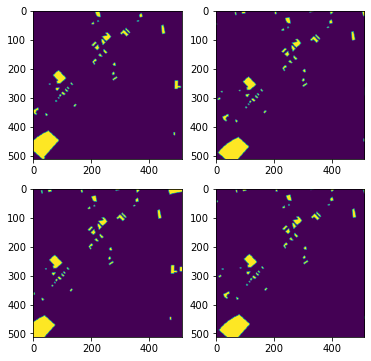

In [5]:
for inp, real, lat, dat in test_dataset.take(1):
    inp = inp[0]
    real = real[0]
    lat = lat[0]
    dat = dat[0]
    
plt.imshow((inp * 0.5 + 0.5) * 10)
plt.show()

plt.imshow((real * 0.5 + 0.5))
plt.show()

plt.figure(figsize=(6, 6))
for i in range(4):
    rj_inp, rj_re, rj_la, rj_da = random_jitter(inp, real, lat, dat)
    plt.subplot(2, 2, i + 1)
    plt.imshow((rj_inp * 0.5 + 0.5) * 10)
plt.show()

## Build generator

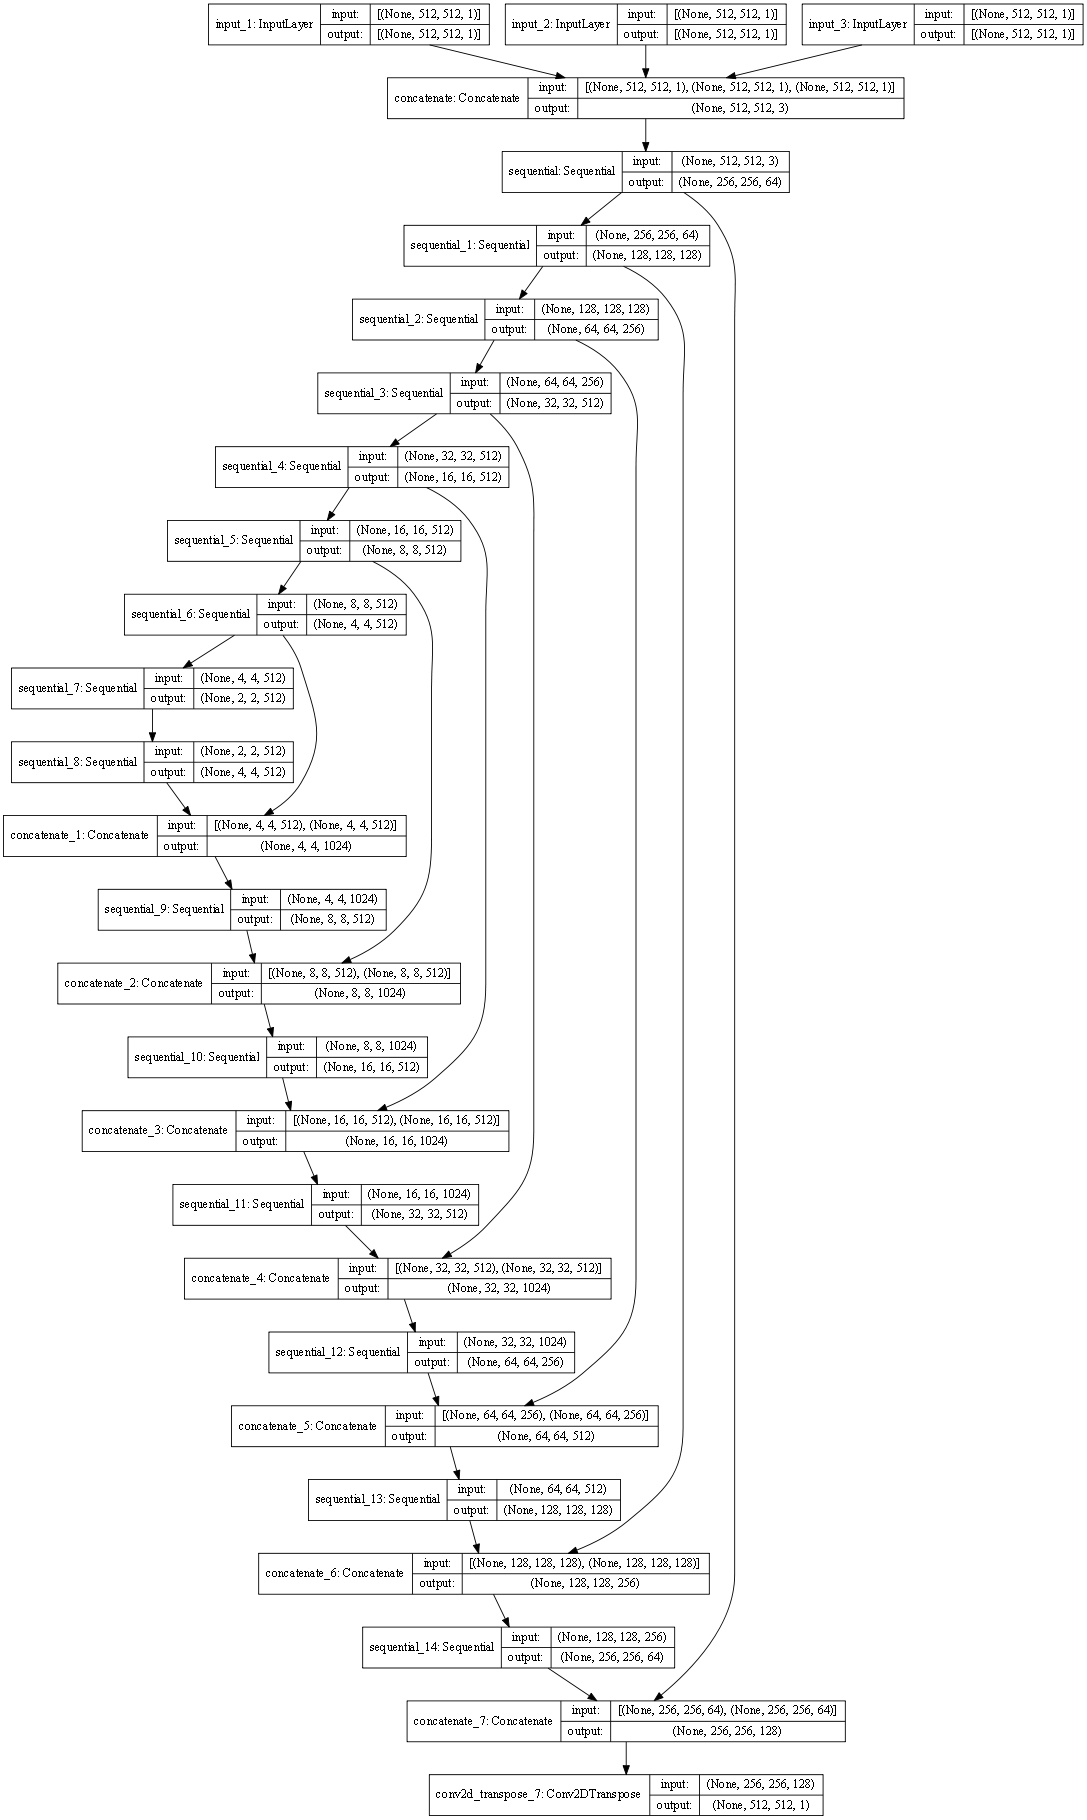

In [6]:
generator = Generator(512,512)
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

## Build discriminator

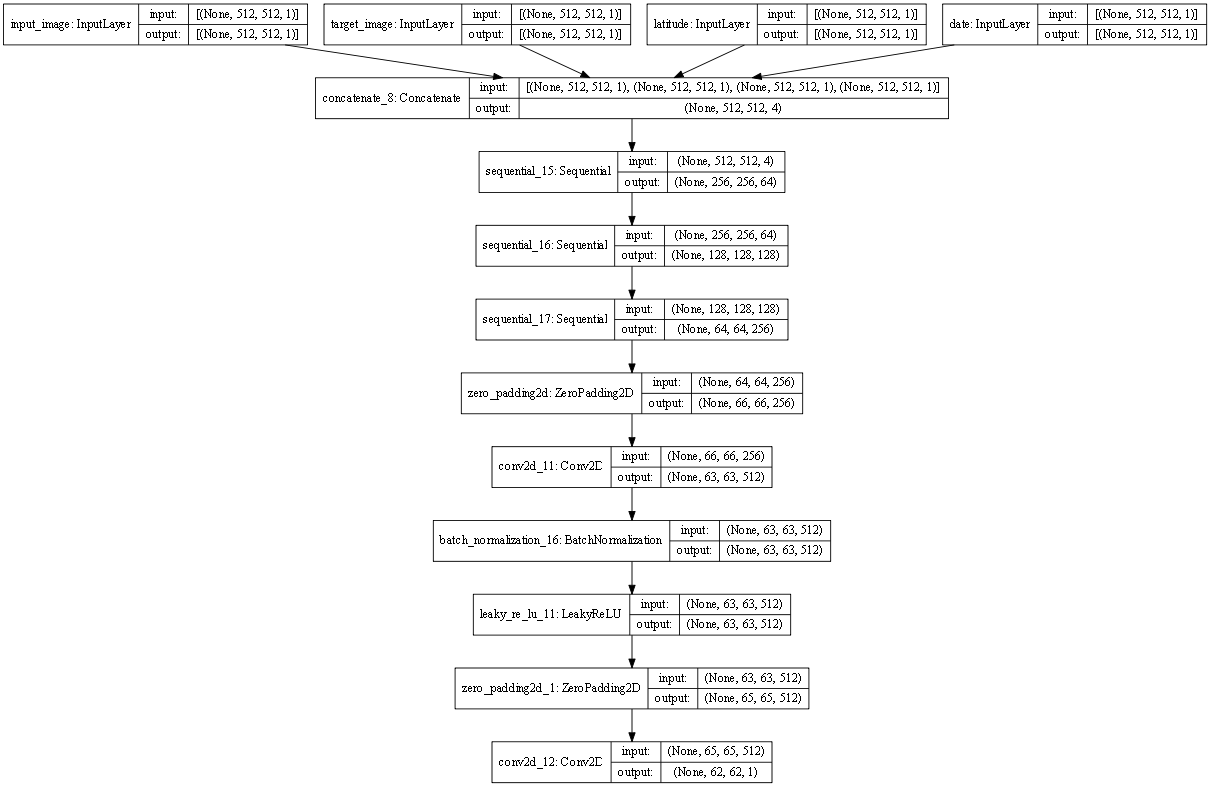

In [7]:
discriminator = Discriminator(512, 512)
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

## Generate images

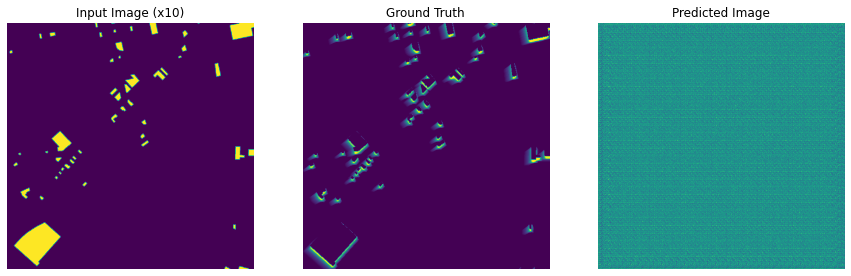

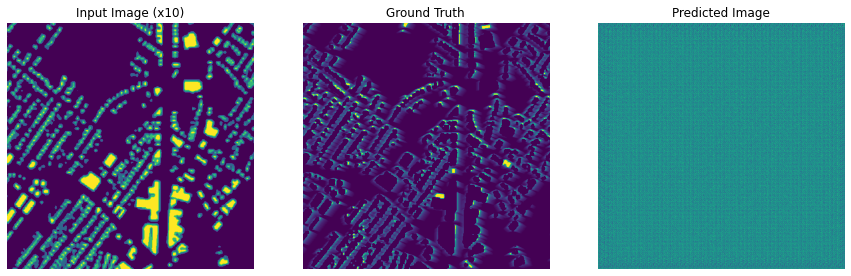

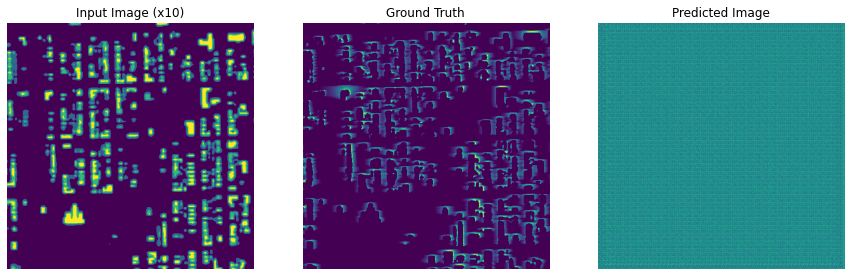

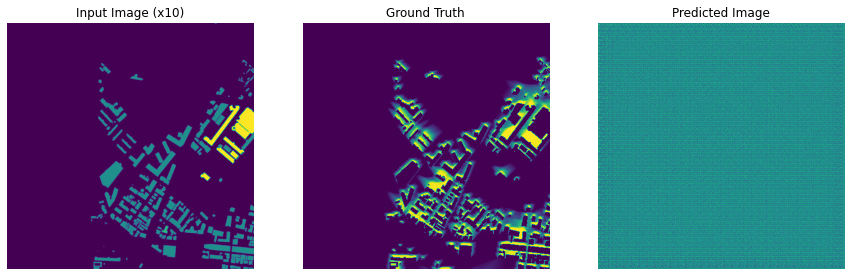

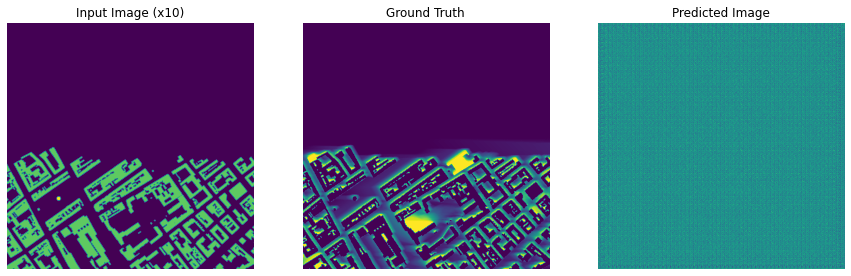

In [8]:
for example_input, example_target, example_lat, example_date in test_dataset.take(5):
    generate_images(generator, example_input, example_lat, example_date, example_target)

## Training

In [19]:
%load_ext tensorboard
%tensorboard --logdir {log_dir} --port 8088

Reusing TensorBoard on port 8088 (pid 23560), started 7:46:31 ago. (Use '!kill 23560' to kill it.)

Time taken for 1000 steps: 88.27 sec



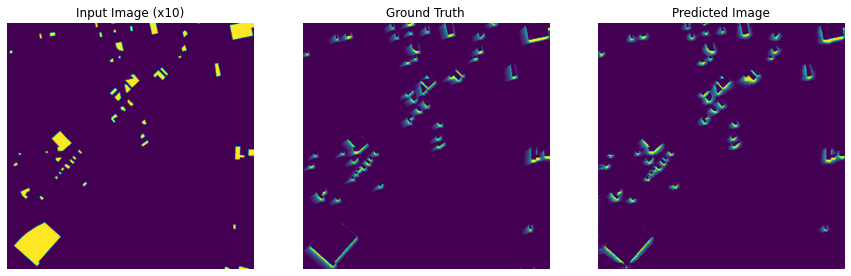

Step: 37k
..........................................................................................

In [ ]:
fit(checkpoint_path, generator, discriminator, train_dataset, test_dataset, 100000)